# Algorithm Analysis

![Son of a Man](https://upload.wikimedia.org/wikipedia/en/e/e5/Magritte_TheSonOfMan.jpg)

In [1]:
from itertools import permutations

def anagram_solution_brute(word1, word2):
    word1_perms = [''.join(p) for p in permutations(word1)]
    return word2 in word1_perms

In [2]:
def anagram_solution_checkoff(word1, word2):
    if len(word1) != len(word2):
        return False
    
    word2_lst = list(word2)

    pos1 = 0
    is_anagram = True

    while pos1 < len(word1) and is_anagram:
        pos2 = 0
        found = False
        while pos2 < len(word2_lst) and not found:
            if word1[pos1] == word2_lst[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            word2_lst[pos2] = None
        else:
            is_anagram = False

        pos1 = pos1 + 1

    return is_anagram

In [3]:
def anagram_solution_sort_compare(word1, word2):
    if len(word1) != len(word2):
        return False

    word1_lst = list(word1)
    word2_lst = list(word2)

    word1_lst.sort()
    word2_lst.sort()

    pos = 0
    matches = True

    while pos < len(word1) and matches:
        if word1_lst[pos] == word2_lst[pos]:
            pos = pos + 1
        else:
            return False

    return matches

In [4]:
def anagram_solution_count_compare(word1, word2):
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(word1)):
        pos = ord(word1[i]) - ord('a')
        c1[pos] = c1[pos] + 1

    for i in range(len(word2)):
        pos = ord(word2[i]) - ord('a')
        c2[pos] = c2[pos] + 1

    j = 0
    is_anagram = True
    while j<26 and is_anagram:
        if c1[j]==c2[j]:
            j = j + 1
        else:
            is_anagram = False

    return is_anagram

In [5]:
print(anagram_solution_brute('hello','world'))
print(anagram_solution_brute('abcd','dcba'))
print(anagram_solution_brute('abcd','dcbaa'))
print(anagram_solution_brute('abcd','dcbad'))

False
True
False
False


9.775161743164062e-06
1.0013580322265625e-05
8.821487426757812e-06
1.049041748046875e-05
2.5033950805664062e-05
5.14984130859375e-05
0.00027441978454589844
0.002123594284057617
0.016512632369995117
0.1470353603363037
1.531409502029419
14.667315244674683


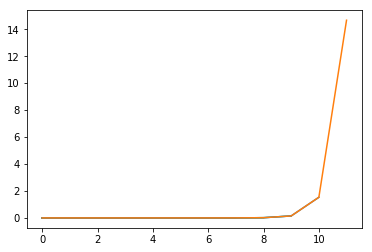

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import string
import time
from itertools import permutations

word = string.ascii_lowercase

time_lst = []
for i in range(len(word)):
    start = time.time()
    [''.join(p) for p in permutations(word[0:i])]
    stop = time.time()
    elapsed = stop - start
    print(elapsed)
    time_lst.append(elapsed)
    plt.plot(time_lst)
    if elapsed > 10:
        break

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import random
from itertools import permutations

def anagram_chart(solution_method, words1, words2):
    word_len = []
    time_lst = []
    for i in range(len(words1)):
        start = time.time()
        solution_method(words1[i], words2[i])
        stop = time.time()
        elapsed = stop - start
        time_lst.append(elapsed)
        word_len.append(len(words1[i]))
        plt.plot(word_len, time_lst)
        if elapsed > 10:
            break

In [8]:
word_lst_1 = ['robes', 'barely', 'pirates', 'nameless', 'auctioned', 'discounter', 'predictable', 'cameralistic', 'thysanopteran', 'protuberantial', 'nonuniversalist', 'thermonastically', 'basiparachromatin']
word_lst_2 = ['sober', 'barley', 'parties', 'salesmen', 'education', 'introduces', 'bidpceleart', 'acclimatiser', 'parasyntheton', 'perturbational', 'involuntariness', 'hematocrystallin', 'marsipobranchiata']

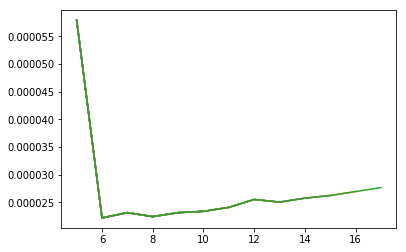

In [9]:
anagram_chart(anagram_solution_count_compare, word_lst_1, word_lst_2)

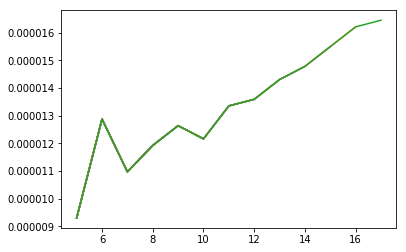

In [10]:
anagram_chart(anagram_solution_sort_compare, word_lst_1, word_lst_2)

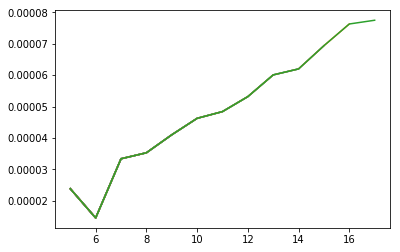

In [11]:
anagram_chart(anagram_solution_checkoff, word_lst_1, word_lst_2)

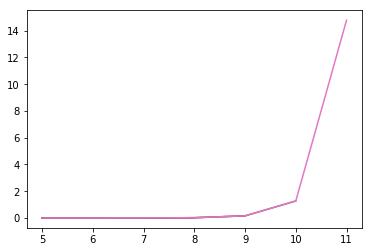

In [12]:
anagram_chart(anagram_solution_brute, word_lst_1, word_lst_2)

In [13]:
sum = 0
t = time.process_time()
for i in range(1000):
    sum = sum + 1
for j in range(1000):
    sum = sum + 1
elapsed_time = time.process_time() - t
print('elapsed time is {}'.format(elapsed_time))

elapsed time is 0.001104397999995399


In [14]:
sum = 0
t = time.process_time()
for i in range(1000):
    for j in range(1000):
        sum = sum + 1
elapsed_time = time.process_time() - t
print('elapsed time is {}'.format(elapsed_time))

elapsed time is 0.19007901099999458


In [15]:
sum = 0
t = time.process_time()
x = 1
y = 2
z = 3
for i in range(1000000):
    sum = sum + 1
elapsed_time = time.process_time() - t
print('elapsed time is {}'.format(elapsed_time))

elapsed time is 0.15549667999999883


In [16]:
sum = 0
t = time.process_time()
x = 1
for i in range(1000000):
    sum = sum + 1
elapsed_time = time.process_time() - t
print('elapsed time is {}'.format(elapsed_time))

elapsed time is 0.1436190960000019


# NP-Complete
![General solutions get you a 50% tip.](https://imgs.xkcd.com/comics/np_complete.png "General solutions get you a 50% tip.")
[NP-Complete](https://xkcd.com/287/)